In [1]:
 # PRELIMINARY ANALYSIS AND VISUALIZATION OF MOVIE DATA

C:\Users\HP\Documents\Movie-Recommendation-System


In [30]:
import os
print(os.getcwd())      #used to retrieve the current working directory

C:\Users\HP\Documents\Movie-Recommendation-System


In [27]:
#Project setup :-
import pandas as pd
imdb_data = pd.read_csv('imdb_top_1000.csv')           #loading IMDB_data from kaggle with 1000 films dataset using pandas library

In [3]:
print(imdb_data.head())                   #print's the first 5 rows using head() function

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [28]:
#Data Cleaning :-
# Check for missing data
missing_data = imdb_data.isna().sum()        # Calculate the count of missing values in each column
print(missing_data)

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [5]:
#The attributes Certificate, Meta_score and Gross has missing data

In [6]:
# Handling missing values
imdb_data['Certificate'].fillna('Not Rated', inplace=True)                # Fill missing certificates with 'Not Rated'
imdb_data['Meta_score'].fillna(imdb_data['Meta_score'].median(), inplace=True)            # Fill missing Meta_score with median

# For 'Gross', we got an error due to presence of commas between the values. so, we need to remove commas and then replace the missing values with median

imdb_data['Gross'].fillna(imdb_data['Gross'].str.replace(',', '').astype(float).median(), inplace=True)

In [7]:
print(imdb_data.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [8]:
missing_data= imdb_data.isna().sum()
print(missing_data)                   

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [9]:
# Cleaning data
imdb_data['Certificate'] = imdb_data['Certificate'].str.strip()
imdb_data['Director'] = imdb_data['Director'].str.strip()
imdb_data['Star1'] = imdb_data['Star1'].str.strip()
imdb_data['Star2'] = imdb_data['Star2'].str.strip()
imdb_data['Star3'] = imdb_data['Star3'].str.strip()
imdb_data['Star4'] = imdb_data['Star4'].str.strip()

categorical_columns = ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
imdb_data[categorical_columns] = imdb_data[categorical_columns].applymap(str.lower)


In [10]:
missing_data = imdb_data.isna().sum()
print(missing_data)

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [11]:
# Remove commas from 'Gross' column and convert it to float
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '').astype(float)

# Fill missing values in 'Gross' column with the median value
imdb_data['Gross'].fillna(imdb_data['Gross'].median(), inplace=True)


In [12]:
# Print rows where 'Gross' is either missing or not a valid numeric value
print(imdb_data[imdb_data['Gross'].isnull() | imdb_data['Gross'].apply(lambda x: not isinstance(x, (int, float)))])

Empty DataFrame
Columns: [Poster_Link, Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross]
Index: []


In [13]:
# Converting 'Gross' column to numeric values
imdb_data['Gross'] = pd.to_numeric(imdb_data['Gross'], errors='coerce')

# Handling missing values in 'Gross' column
imdb_data['Gross'].fillna(imdb_data['Gross'].median(), inplace=True)


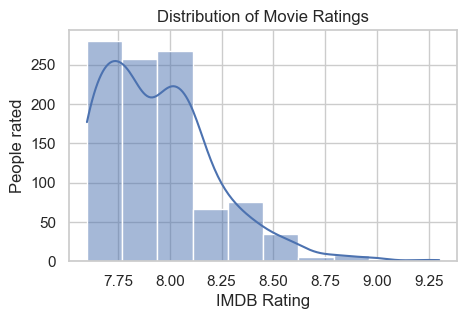

In [29]:
#Data Visualization :-

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(5, 3))
sns.set(style="whitegrid")

# Plot the distribution of IMDB_Rating
sns.histplot(data=imdb_data, x='IMDB_Rating', bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('People rated')
plt.show()


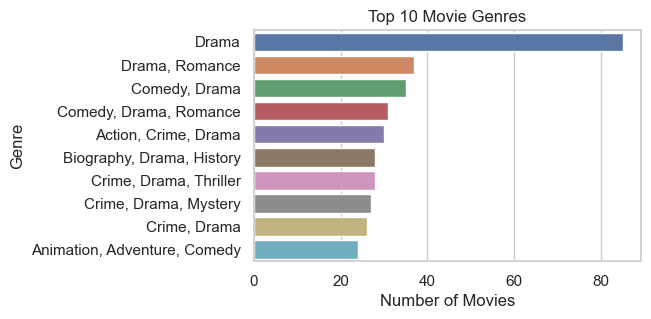

In [15]:
# Get the top 10 genres
top_genres = imdb_data['Genre'].value_counts().head(10)

# Set up the figure and axes
plt.figure(figsize=(5, 3))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


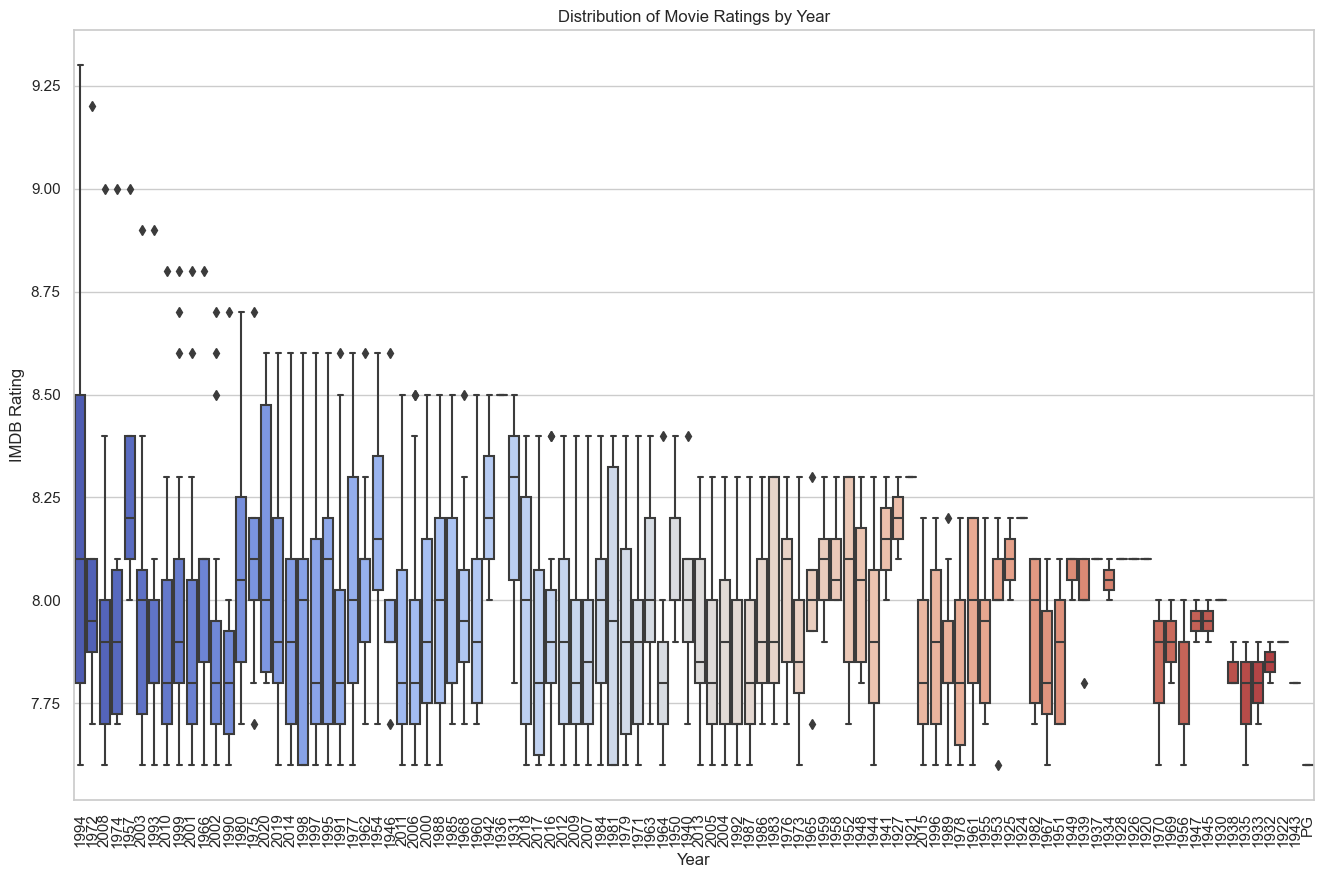

In [16]:
#movies rating by year
plt.figure(figsize=(16,10))
sns.boxplot(x='Released_Year', y='IMDB_Rating', data=imdb_data, palette='coolwarm')
plt.title('Distribution of Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90)
plt.show()


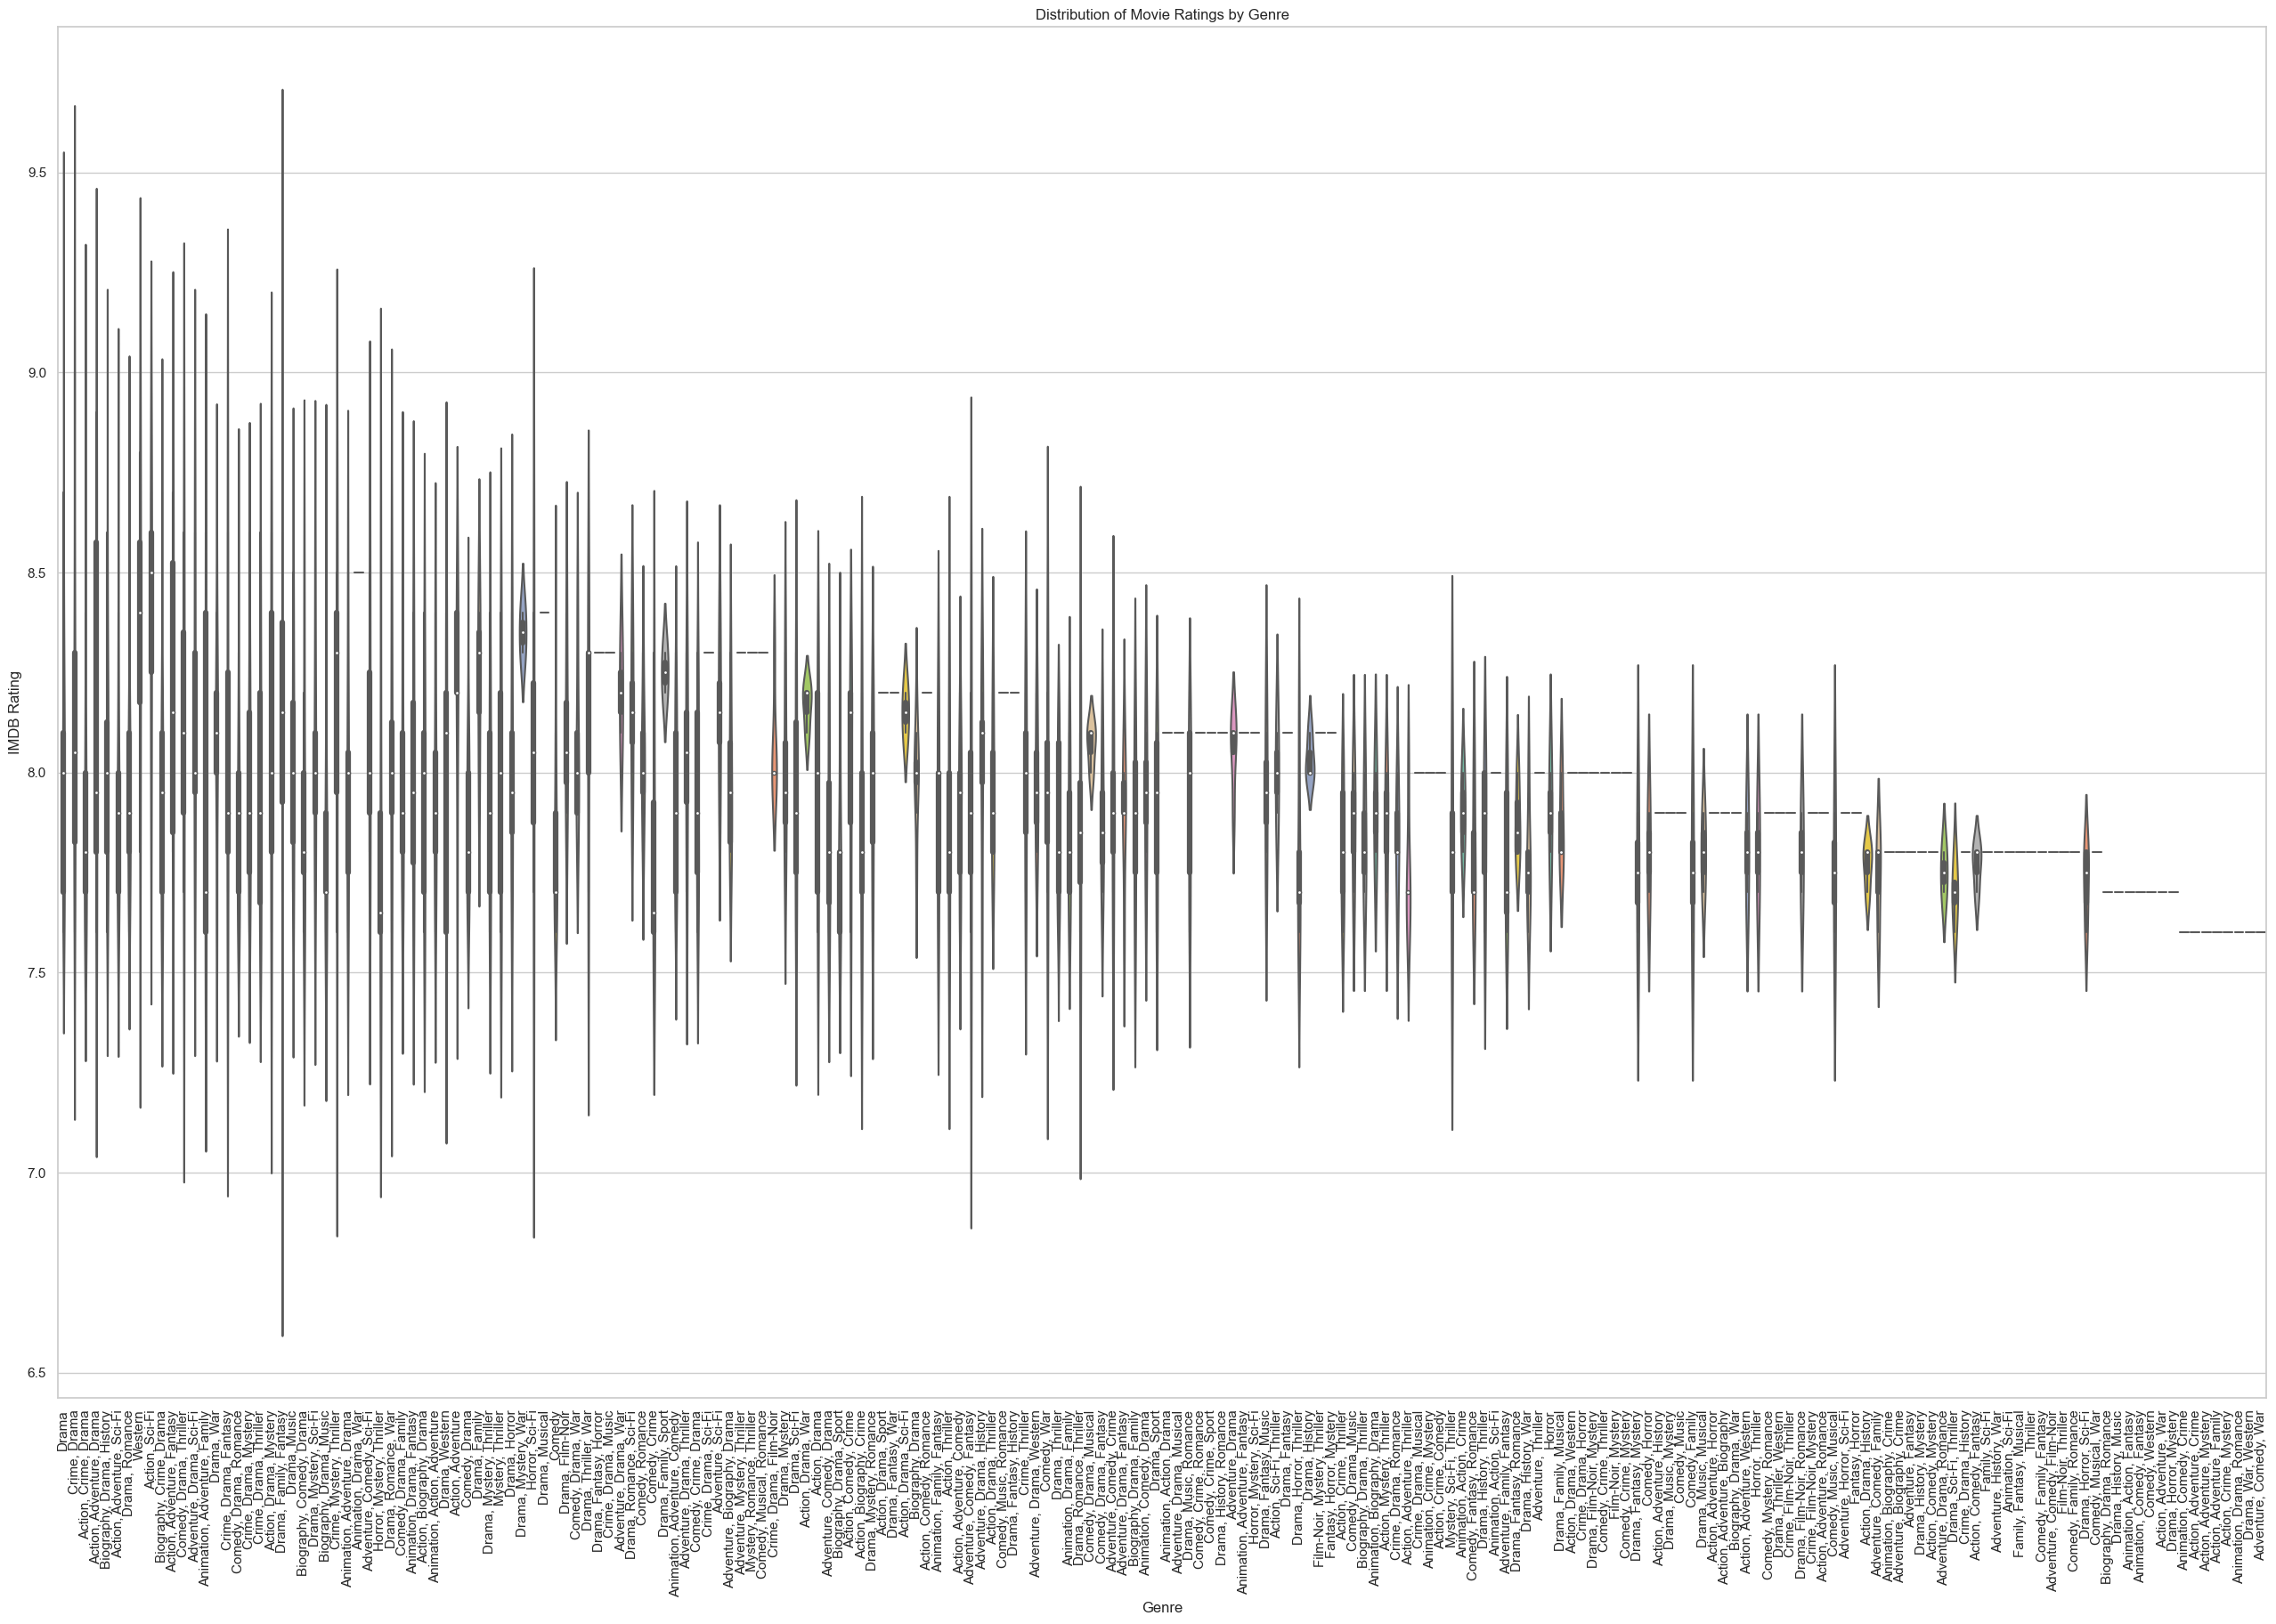

In [17]:
#Distribution of Movie Ratings by Genre
plt.figure(figsize=(32,20))

sns.violinplot(x='Genre', y='IMDB_Rating', data=imdb_data, palette='Set2')
plt.title('Distribution of Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=90)
plt.show()

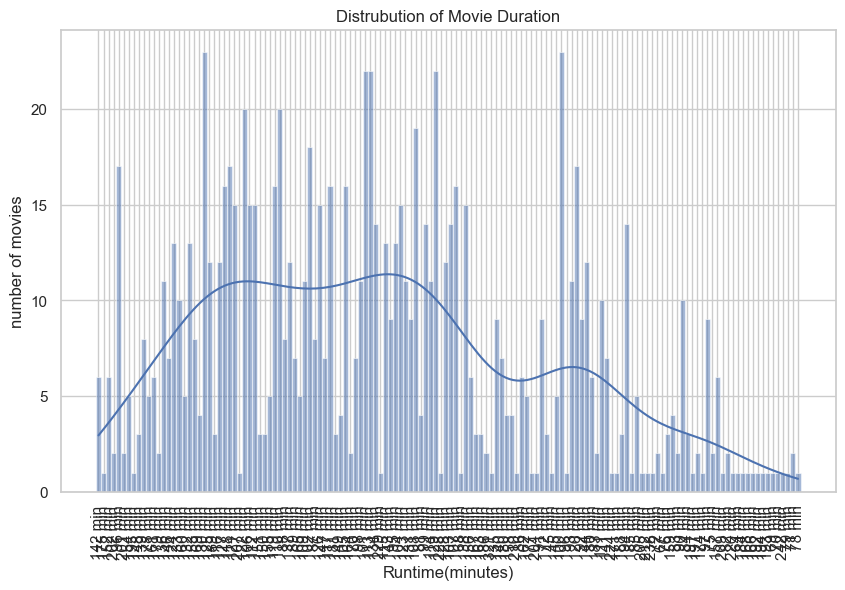

In [18]:
#Distribution of Movie Duration 
plt.figure(figsize=(10,6))
sns.histplot(data=imdb_data,x='Runtime',bins=20,kde=True)
plt.title('Distrubution of Movie Duration')
plt.xlabel('Runtime(minutes)')
plt.ylabel('number of movies')
plt.xticks(rotation=90)
plt.show()
           

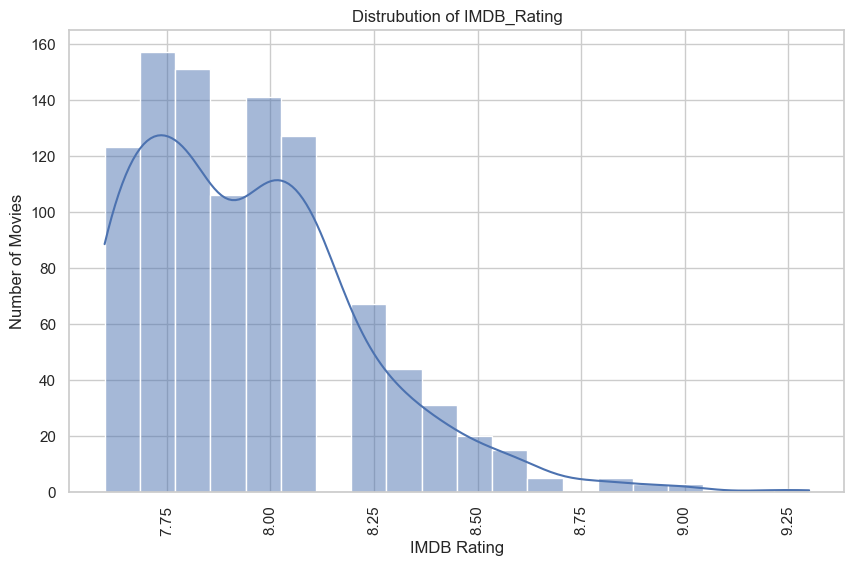

In [19]:
#PLoting the Distribution of IMDB_Rating 
plt.figure(figsize=(10,6))
sns.histplot(data=imdb_data,x='IMDB_Rating',bins=20,kde=True)
plt.title('Distrubution of IMDB_Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()
           

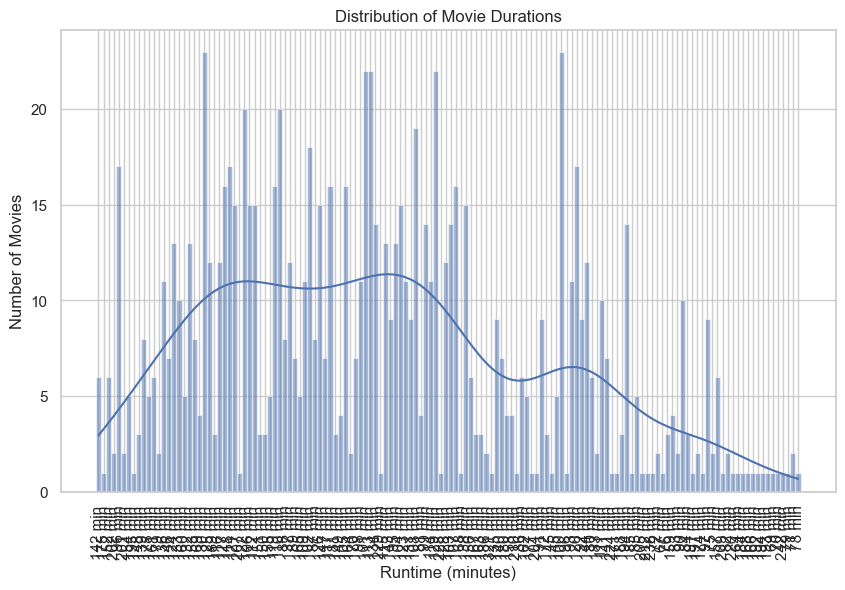

In [20]:
#Ploting the Distribution of Movie Durations by Number of Movies
plt.figure(figsize=(10, 6))
sns.histplot(data=imdb_data, x='Runtime', bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


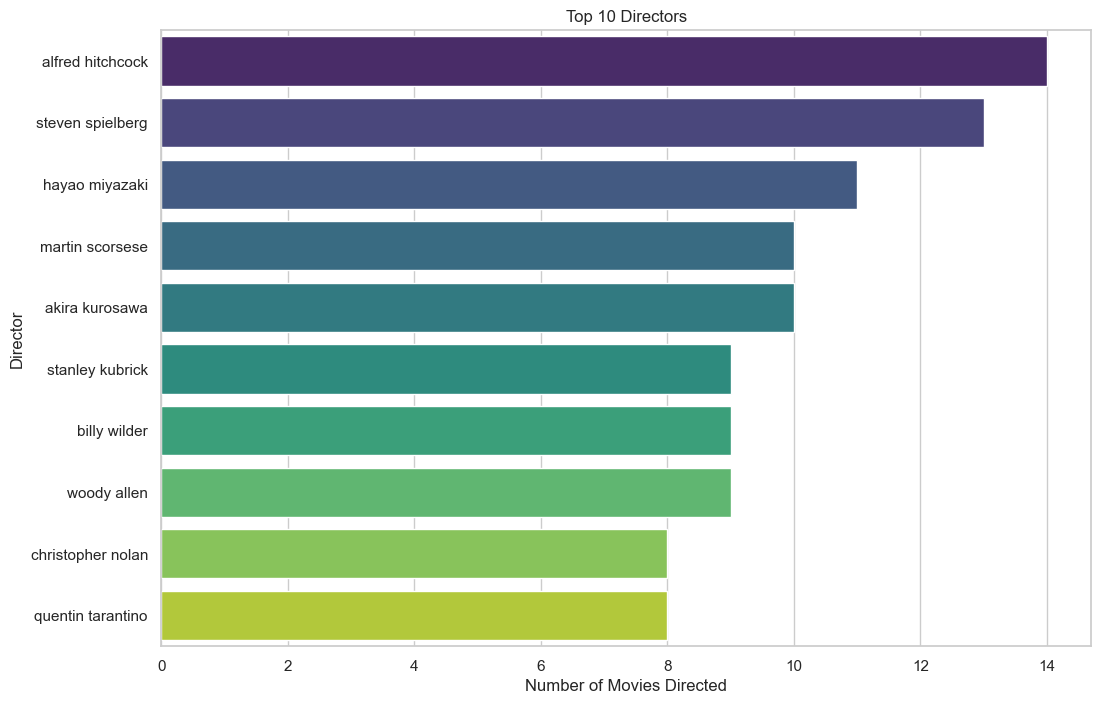

In [21]:
# Get the top 10 directors
top_directors = imdb_data['Director'].value_counts().head(10)

# Set up the figure and axes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.show()


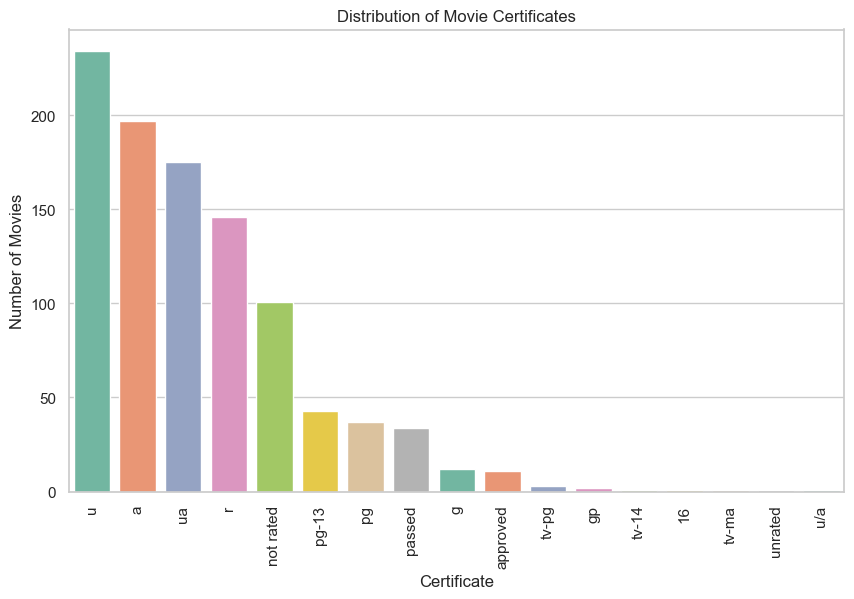

In [22]:
# ploting the Distribution of Movie Certificates by Number of Movies
plt.figure(figsize=(10, 6))
sns.countplot(data=imdb_data, x='Certificate', order=imdb_data['Certificate'].value_counts().index, palette='Set2')  #countplot is used to show the number of ocurrences
plt.title('Distribution of Movie Certificates')
plt.xlabel('Certificate')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


In [23]:
#ADVANCE DATA ANALYSIS AND VISUALIZATION

In [24]:
#Data Preprocessing :-

#Checking the Data Types and Missing Values of:
print(imdb_data[['IMDB_Rating', 'Gross', 'Runtime']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDB_Rating  1000 non-null   float64
 1   Gross        1000 non-null   float64
 2   Runtime      1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
None


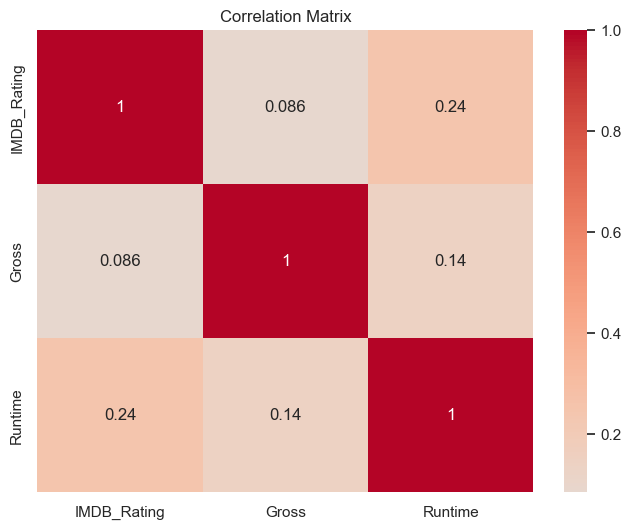

In [25]:
# Clean and convert 'Runtime' column to numeric
imdb_data['Runtime'] = imdb_data['Runtime'].apply(lambda x: float(str(x).split()[0]) if isinstance(x, str) else x)

# Calculating the correlation matrix for IMDB_Rating, Gross, Runtime
correlation_matrix = imdb_data[['IMDB_Rating', 'Gross', 'Runtime']].corr()

# Set up the figure and axes
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


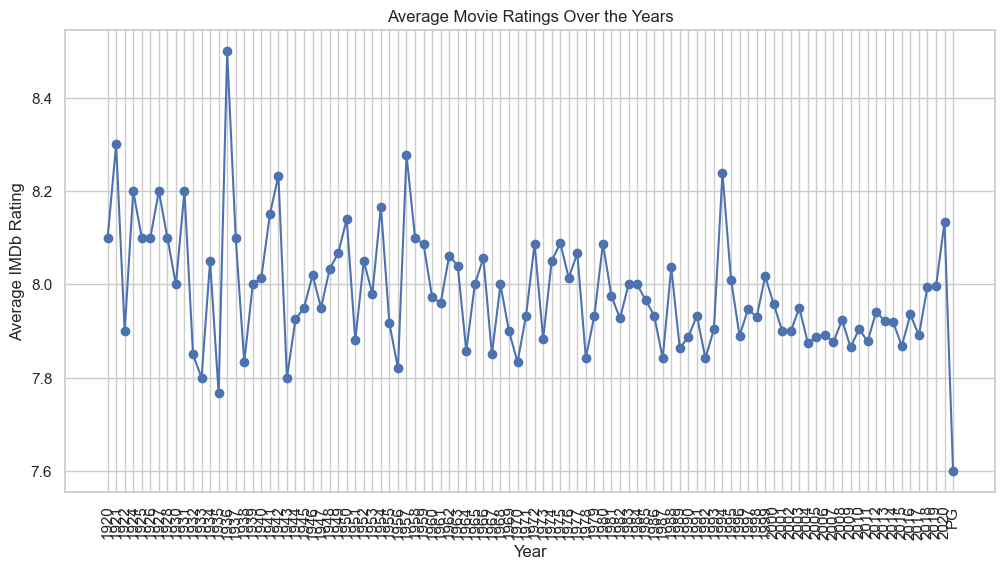

In [26]:
# Calculating the average IMDb rating for each year
average_ratings_by_year = imdb_data.groupby('Released_Year')['IMDB_Rating'].mean()

# Set up the figure and axes
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values, marker='o')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=90)
#plt.grid(True)
plt.show()


In [32]:
#This was a foundation for building a basic movie recommendation system
#-----------------------------------------------------------------------
#We can recommend a Movie on the insights of Data Exploration and Visualization
#******************************************************************************
#     We can recommed a movie based on:-
#          Popular Movies: Recommend movies with the highest number of votes (popularity).

          # HIGHLY RATED MOVIES : Suggest movies with high IMDB ratings.
          # SIMILAR GENRES : Recommend movies with similar genres based on user input.
          # RECENT RELEASES : Suggest movies released in the past year.
          # RUNTIME PREFERNCES : Recommend movies based on runtime preferences (short or long).